# Chronic Disease Dataset Exploration
### A Case Study on Diabetes Prevalence Among African-Americans

## Set up Environment

In [165]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

## Import Dataset

In [5]:
# df = pd.read_csv('chronic.csv', dtype=types_dict, header=0)
df = pd.read_csv('chronic.csv', header=0)

## Clean Dataset

In [6]:
clean_df = df.drop(['TopicID', 'DataValueFootnoteSymbol', 'Response', 'ResponseID', 'StratificationCategory2',
                   'Stratification2', 'StratificationCategory3', 'Stratification3',
                   'StratificationCategoryID2', 'StratificationCategoryID3',
                   'StratificationID2', 'StratificationID3', 'QuestionID', 'DataValueTypeID', 'LocationID',
                   'StratificationCategoryID1', 'StratificationID1'], axis=1)

In [129]:
clean_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'GeoLocation'],
      dtype='object')

In [7]:
clean_df.Topic.value_counts(normalize=True)

Diabetes                                           0.153220
Chronic Obstructive Pulmonary Disease              0.151484
Cardiovascular Disease                             0.145823
Arthritis                                          0.080361
Overarching Conditions                             0.075737
Asthma                                             0.075543
Nutrition, Physical Activity, and Weight Status    0.064691
Alcohol                                            0.061283
Tobacco                                            0.056388
Older Adults                                       0.029439
Cancer                                             0.027132
Chronic Kidney Disease                             0.023849
Oral Health                                        0.021429
Mental Health                                      0.013902
Immunization                                       0.010044
Disability                                         0.005711
Reproductive Health                     

In [8]:
diabetes = clean_df[clean_df['Topic'] == 'Diabetes'].reset_index(drop=True)

In [9]:
diabetes.Question.unique()

array(['Foot examination among adults aged >= 18 years with diagnosed diabetes',
       'Mortality due to diabetes reported as any listed cause of death',
       'Mortality with diabetic ketoacidosis reported as any listed cause of death',
       'Influenza vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes',
       'Diabetes prevalence among women aged 18-44 years',
       'Adults with diagnosed diabetes aged >= 18 years who have taken a diabetes self-management course',
       'Prevalence of diagnosed diabetes among adults aged >= 18 years',
       'Dilated eye examination among adults aged >= 18 years with diagnosed diabetes',
       'Prevalence of depressive disorders among adults aged >= 18 years with diagnosed diabetes',
       'Glycosylated hemoglobin measurement among adults aged >= 18 years with diagnosed diabetes',
       'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with diagnosed diabetes',
       'Hospitali

In [147]:
def chloro(df, topic, question, dvtype, dvunit, year, strat):
    """ Plots a chloropleth map based on specific 
    topic, question, data value type, year, and stratification.
    
    Keyword Arguments:
    df       -- cleaned dataframe     (pd.DataFrame)
    topic    -- health topic          (str)
    question -- topic question        (str)
    dvtype   -- DataValueType value   (str)
    dvunit   -- DataValueUnit value   (str)
    year     -- YearStart value       (str)
    strat    -- Stratification1 value (str)
    """
    
    assert type(df) == pd.DataFrame;
    assert type(topic) == str;
    assert type(question) == str;
    assert type(dvtype) == str;
    assert type(dvunit) == str;
    assert type(year) == int;
    assert type(strat) == str;
    
    # specify topic
    assert topic in df['Topic'].unique(), "Invalid topic, choose one: " + str(df['Topic'].unique());
    topic_df = df[df['Topic'] == topic].reset_index(drop=True);
    
    # specify question
    assert question in topic_df['Question'].unique(), "Invalid question, choose one: " + str(topic_df['Question'].unique());
    question_df = topic_df[topic_df['Question'] == question].reset_index(drop=True);
    
    # convert datavalue to numeric/NaN 
    question_df['DataValue'] = pd.to_numeric(question_df['DataValue'], errors = 'coerce');

    # drop nan datavalue rows
    clean_question_df = question_df[question_df['DataValue'].notna()];
    
    # drop all non-mainland states
    clean_question_df = clean_question_df[clean_question_df['LocationAbbr'] != 'US'];
    clean_question_df = clean_question_df[clean_question_df['LocationAbbr'] != 'DC'];
    clean_question_df = clean_question_df[clean_question_df['LocationAbbr'] != 'PR'];
    clean_question_df = clean_question_df[clean_question_df['LocationAbbr'] != 'GU'];
    
    # specify map data value type
    assert dvtype in clean_question_df['DataValueType'].unique(), "Invalid dvtype, choose one: " + str(clean_question_df['DataValueType'].unique())
    map_data = clean_question_df[clean_question_df['DataValueType'] == dvtype];
    
    # specify map data year
    assert year in clean_question_df['YearStart'].unique(), "Invalid year, choose one: " + str(clean_question_df['YearStart'].unique())
    map_data = map_data[map_data['YearStart'] == year];
  
    # specify map data strat
    assert strat in clean_question_df['Stratification1'].unique(), "Invalid strat, choose one: " + str(clean_question_df['Stratification1'].unique())
    map_data = map_data[map_data['Stratification1'] == strat];
    
    # plot chloropleth map
    assert dvunit in map_data['DataValueUnit'].unique(), "Invalid dvunit, choose one: " + str(map_data['DataValueUnit'].unique())
    fig = px.choropleth(
        locations = map_data['LocationAbbr'], 
        locationmode = "USA-states", 
        color = map_data['DataValue'],
        range_color= (40, 160),
        scope = "usa", 
        title = "{0} in {1} ({2})".format(question.title(), str(year), strat),
        labels = {'color': dvunit}
    )
    fig.show()

In [154]:
chloro(clean_df, 'Diabetes', 'Mortality due to diabetes reported as any listed cause of death', 'Age-adjusted Rate', 'cases per 100,000', 2014, 'Overall');
chloro(clean_df, 'Diabetes', 'Mortality due to diabetes reported as any listed cause of death', 'Age-adjusted Rate', 'cases per 100,000', 2014, 'Black, non-Hispanic');

In [149]:
chloro(clean_df, 'Diabetes', 'Mortality due to diabetes reported as any listed cause of death', 'Age-adjusted Rate', 'cases per 100,000', 2013, 'Black, non-Hispanic')

In [128]:
chloro(clean_df, 'Diabetes', 'Prevalence of gestational diabetes', 'Prevalence', '%', 2010, 'Overall')

# NLP with NLTK

### Finding most frequent words with each topic

In [156]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk import FreqDist
import re

df_list = []
for topic in clean_df['Topic'].unique():
    
    questions = clean_df[clean_df['Topic'] == topic]['Question'].unique()
    
    text = ""
    for x in questions:
        text = text + x + " "
    text = text.lower()
    text = re.sub(r'[>=()\-,]', ' ', text)
    for word in ['aged', 'among', 'with', 'years', 'type', 'prevalence', 'set', 'due', 'adults', 'recent', 'current', r'^use$', 'amount']:
        text = re.sub(word, ' ', text)
    text = re.sub(r'[\s\t\d]', ' ', text)

    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(text) 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

    fdist = FreqDist(filtered_sentence)
    most_common_words = fdist.most_common(10)
    for x in most_common_words[:3]:
        df_list.append({"Topic": topic, "Word": x[0], "Frequency": x[1]})
    
    print(topic)
    print([x[0] for x in most_common_words])
    print()
freq_df = pd.DataFrame(df_list)

Alcohol
['alcohol', 'binge', 'drinking', 'excise', 'tax', 'beverage', 'drink', 'heavy', 'women', 'use']

Nutrition, Physical Activity, and Weight Status
['school', 'students', 'high', 'physical', 'activity', 'care', 'obesity', 'daily', 'consumption', 'education']

Cardiovascular Disease
['heart', 'disease', 'mortality', 'high', 'coronary', 'stroke', 'blood', 'pressure', 'vaccination', 'noninstitutionalized']

Arthritis
['arthritis', 'doctor', 'diagnosed', 'limitation', 'diabetes', 'physical', 'inactivity', 'obese', 'fair', 'poor']

Diabetes
['diabetes', 'diagnosed', 'vaccination', 'noninstitutionalized', 'listed', 'examination', 'mortality', 'reported', 'cause', 'death']

Tobacco
['tobacco', 'smoking', 'cigarette', 'smoke', 'smokeless', 'use', 'states', 'youth', 'pneumococcal', 'vaccination']

Overarching Conditions
['health', 'women', 'poverty', 'self', 'rated', 'status', 'insurance', 'high', 'school', 'completion']

Chronic Obstructive Pulmonary Disease
['chronic', 'obstructive', 'pu

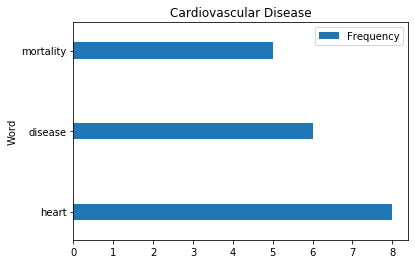

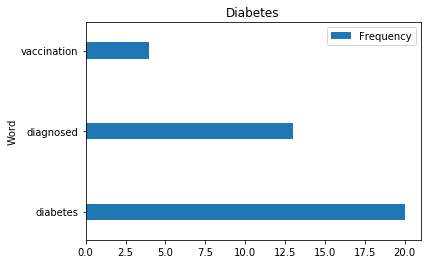

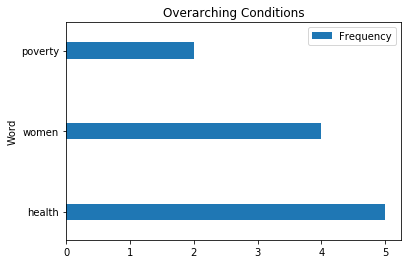

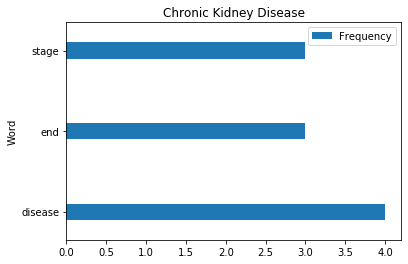

In [201]:
word_chart = freq_df.loc[freq_df['Topic'].isin(['Diabetes', 'Cardiovascular Disease', 'Chronic Kidney Disease', 'Overarching Conditions'])]
for t in word_chart.Topic.unique():
    word_chart.loc[word_chart['Topic'] == t].drop('Topic', axis=1).set_index('Word').plot.barh(width=0.2, title=t)

### Predicting topic given a new question

In [115]:
from sklearn.datasets import fetch_20newsgroups

In [118]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [121]:
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [122]:
text_clf

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)